In [265]:
%matplotlib inline
import numpy as np

x=0.
y=0.

def obj_fun(x,y, z):
    return 2.*x**2 -2.*x*y -3*y+2*y**2+2*z**2 +1.5



class opt:
    def __init__(self,opts,name,k,beta):
        self.name = name
        self.opts = opts #options
        self.n = opts.shape[0] # number of options
        self.q = np.zeros(self.n, dtype = np.float_) #pheromone vector
        self.p = np.arange(0,self.n, 1,dtype=np.int_) # [0,1,2,...,n] all choices
        self.weights = self.calc_weights(k,beta) # weights for calculating probabilities
        
        
    def calc_weights(self,k, beta):
        " Probability of choosing route x is proportional to: P(x) = (tau_x+k)^beta/sum_i((tau_i+k)^b) for all i in I, and x member of I"
        return np.power(self.q+k, beta)/np.sum(np.power(self.q+k,beta))
        
    
    def update_weights(self,k,beta):
        " calculate the probability vector based on pheromone concentrations "
        self.weights = self.calc_weights(k,beta)
        
    def add_pheromone(self, i,q,):
        " add pheromone to the pheromone vector "
        #index i, quantity q
        self.q[i]+=q
    
    def evaporate(self, tau):
        " evaporate the pheromone "
        self.q *= tau
        
    def greedy(self):
        " return the index of the choice with the most pheromone "
        return int(np.argmax(self.q))
    
    def parameter(self, i):
        return self.opts[i]
    
    @property
    def summer(self):
        " return the sum of all pheromones "
        return np.sum(self.q)
    
    @property
    def choose(self):
        " draw a random choice based on probability defined in self.calc_weights "
        x = np.random.rand()
        choice = self.p[np.where(np.cumsum(self.weights) > x)][0]
        return int(choice)
    
    def __enter__(self):
        """ return when class is casted in 'with object as ..:"""
        return self
    
    def __exit__(self, type, value, traceback):
        """ Accompanies __enter__"""
        pass
    
class ant:
    def __init__(self, ant_id ):
        self.routes = []
        self.scores = []
        self.id = ant_id
        
    @property
    def score(self ):
        " return latest score "
        return self.scores[-1]
    @score.setter
    def score(self, x):
        " keep track of the performance of the routes "
        self.scores.append(x)
        
    @property
    def get_route(self):
        " return the latest route "
        return self.routes[-1]
        
    def new_route(self ):
        " append the list of routes with a new one "
        self.routes.append([])
        
    def add_segment(self, segment):
        " add a new step to the current route "
        self.routes[-1].append(segment)
        
        
    def __enter__(self):
        """ return when class is casted in 'with object as ..:"""
        return self
    
    def __exit__(self, type, value, traceback):
        """ Accompanies __enter__"""
        pass

import matplotlib.pyplot as plt
class plotter:
    def __init__(self, n, obj_list):
        plt.ion()
        self.vecs = []
        self.names = []
        self.x = []
        self.y = []
        self.fig, self.axes = plt.subplots(n,1)
        self.figs = []
        for obj in obj_list:
            self.vecs.append([obj.weights,obj.weights])
            x,y = np.meshgrid([0,1], obj.opts)
            self.x.append(x)
            self.y.append(y)
        for x in self.axes:
            self.figs.append(x)

    def renew(self, obj_list):
        for i in range(len(obj_list)):
            self.vecs[i] = [obj_list[i].weights, obj_list[i].weights]
            try:
                self.figs[i].remove()
            except:
                pass
            self.figs[i] = self.axes[i].pcolor(self.vecs[i],vmin=0)
#             self.axes[i].set_title[obj_list[i].name]
        plt.show()
            
# fig.tight_layout()
# plt.show()

<Figure size 432x288 with 0 Axes>

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
 Optimal parameters: [0.5 1.  0. ] with cost 0.0 at step 18


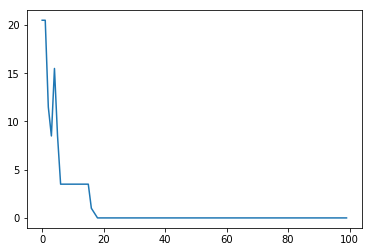

0.0


In [266]:
from pandas import DataFrame as DF
import time
    
class optimizer:
    def __init__(self, fun, k, beta, n_ants):
        self.k = k
        self.ant_list = []
        self.beta = beta
        self.fun = fun
        self.fun_pars = []
        self.best = 1e99
        self.worst = 0.
        for i in range(n_ants):
            self.ant_list.append(ant(i))
            
    def route2args(self,route):
        " return parameters for a route "
        args = np.zeros(len(route),dtype = np.float_)
        for i in range(len(route)):
            args[i] = self.fun_pars[i].parameter(route[i])
        return args
        
    def add_par(self,choices, name):
        " add a parameter (dimension) to the list "
        self.fun_pars.append(opt(choices,name, self.k,self.beta))
        
    def get_route(self,mode='greedy'):
        " get the current optimal route "
        route = []
        for par in self.fun_pars:
            route.append(par.greedy())
        return route
        
    def get_pars(self,mode = 'greedy'):
        " corresponding parameters for a route "
        pars = self.route2args(self.get_route(mode))
        return pars
        
    def eval_fun(self, mode = 'greedy'):
        " function evaluation "
        pars = self.get_pars(mode)
        return self.fun(*pars)
    
    def add_pheromone(self, index_list, q):
        " add q pheromone to the specified routes in index_list "
        for i in range(len(index_list)):
            self.fun_pars[i].add_pheromone(index_list[i],q)
            
    def evaporate(self, tau):
        " do evaporate and re-calculate probabilities on all options "
        for pars in self.fun_pars:
            pars.evaporate(tau)
            pars.update_weights(self.k,self.beta)
            
    def run_regular(self,steps, gain, evap_rate):
        segments = len(self.fun_pars)
        cost = np.zeros(steps, dtype = np.float_)
        
        for i in range(steps):
            "first inner loop, let all ants run through the maze "
            self.worst = 0.
            for agent in self.ant_list:
                agent.new_route()
                " per agent, go through all options "
                for par in self.fun_pars:
                    " choose random (proportional probability) parameter index and add to route "
                    agent.add_segment(par.choose)
                " convert the route of the agent to function parameters and evaluate the cost "
                agent_args = self.route2args(agent.get_route).copy()
                agent.score = self.fun(*agent_args)
                if agent.score < self.best:
                    self.best = agent.score.copy()
                if agent.score > self.worst:
                    self.worst = agent.score.copy()
                
            " second loop, now add the pheromones "
            for agent in self.ant_list:
                " calculate a quantity proportional to the cost "
                q = np.dot(self.worst-agent.score, 1/(self.worst - self.best))
                print(f"ant {agent.id} has rate {q} for cost {agent.score}")
                self.add_pheromone(agent.get_route, gain*q)
                
            print(f'Worst: {self.worst} / Best: {self.best}')
            self.evaporate(evap_rate)
            cost[i]=self.eval_fun(mode='greedy')
        return cost
    
    def run_elitist(self,steps, pheromone_update, evap_rate, plot_interval = 0):
        # deploy
        segments = len(self.fun_pars)
        updating_ant = 0
        cost =np.zeros(steps,dtype =np.float_)
        plot = plotter(segments, self.fun_pars)
        # for all steps
        for i in range(steps):
            "reset loop scorekeeper"
            iteration_best = 1e99
            
            for agent in self.ant_list:
                " loop all ants "
                agent.new_route()
                for par in self.fun_pars:
                    " draw a reinforced-random route for each variable/dimension/option "
                    agent.add_segment(par.choose)
                
                " evaluate the route if necessary "
                args=self.route2args(agent.get_route).copy()
                agent.score = self.fun(*args)
                
                " compare the score "
                if agent.score < iteration_best:
                    iteration_best = agent.score.copy()
                    updating_ant = agent.id
                
            if iteration_best <= self.best:
                " elitist update strategy "
                self.best = iteration_best.copy()
                for agent in self.ant_list:
                    " only update the best ants "
                    if agent.score == iteration_best:
                        self.add_pheromone(self.ant_list[updating_ant].get_route, pheromone_update)
            #evaporate
            self.evaporate(evap_rate)
            cost[i]=self.eval_fun(mode='greedy')
            plot.renew(self.fun_pars)
            print(f"Step {i}")
            time.sleep(.25)
        return cost
            
            
k =.25 #normalizer
beta = 1.7
        
x_range = np.arange(-5,5.1,0.5)
y_range = np.arange(-5,5.1,0.5)
z_range = np.arange(-5,5.1,0.5)
O = optimizer(obj_fun, k,beta, n_ants = 10)
O.add_par(x_range, 'x')
O.add_par(y_range, 'y')
O.add_par(z_range, 'z')
result = O.run_elitist(steps=100,pheromone_update = .8, evap_rate = 0.8, plot_interval = 3)
print(f" Optimal parameters: {O.get_pars()} with cost {O.eval_fun()} at step {np.argmin(result)}")
import matplotlib.pyplot as plt
plt.plot(result)
plt.show()
print(result.min())



[array([2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 2.75238799e-04,
       2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 2.75238799e-04,
       2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 9.94495224e-01,
       2.75238803e-04, 2.75238800e-04, 2.75238801e-04, 2.75238799e-04,
       2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 2.75238799e-04,
       2.75238799e-04]), array([2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 2.75238799e-04,
       2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 2.75238799e-04,
       2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 9.94495224e-01,
       2.75238803e-04, 2.75238800e-04, 2.75238801e-04, 2.75238799e-04,
       2.75238799e-04, 2.75238799e-04, 2.75238799e-04, 2.75238799e-04,
       2.75238799e-04])]
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
[[-5.  -5. ]
 [-4.5 -4.5]
 [-4.  -4. ]
 [-3.5 -3.5]
 [-3.  -3. ]
 [-2.5 -2.5]
 [-2.  -2. ]
 [-1.5 -1.5]
 [-1.  -1. ]
 [-0.5 -0.5]
 

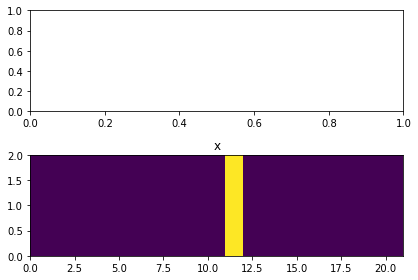

In [267]:
import matplotlib.pyplot as plt
obj = O.fun_pars[0]
Z = obj.weights
Z= [Z,Z]
print(Z)
print(obj.opts)
y, x = np.meshgrid( [0,1],obj.opts)
print(x)
figs = []

fig, ax = plt.subplots(2, 1)
for x in ax:
    figs.append(x)

# Z = O.fun_pars[0].weights
# print(Z)
figs[0] = ax[1].pcolor(Z,vmin=0)
ax[1].set_title(obj.name)

# c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
# ax1.set_title('thick edges')

fig.tight_layout()
plt.show()